c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error on Clean Data: 0.8117


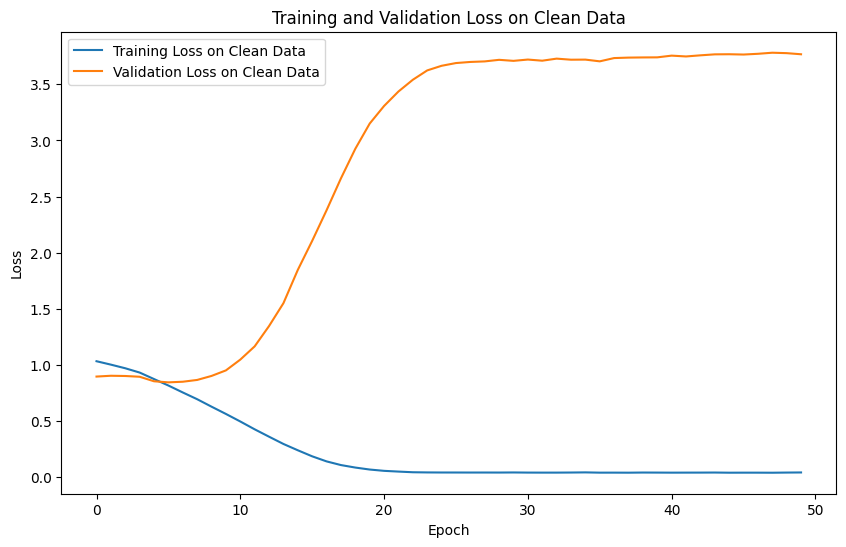

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


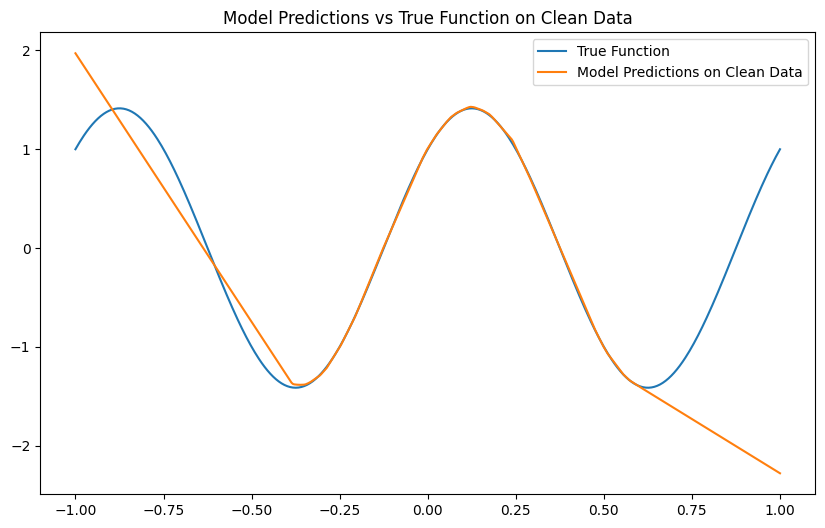

Mean Squared Error on Noisy Data: 0.7952


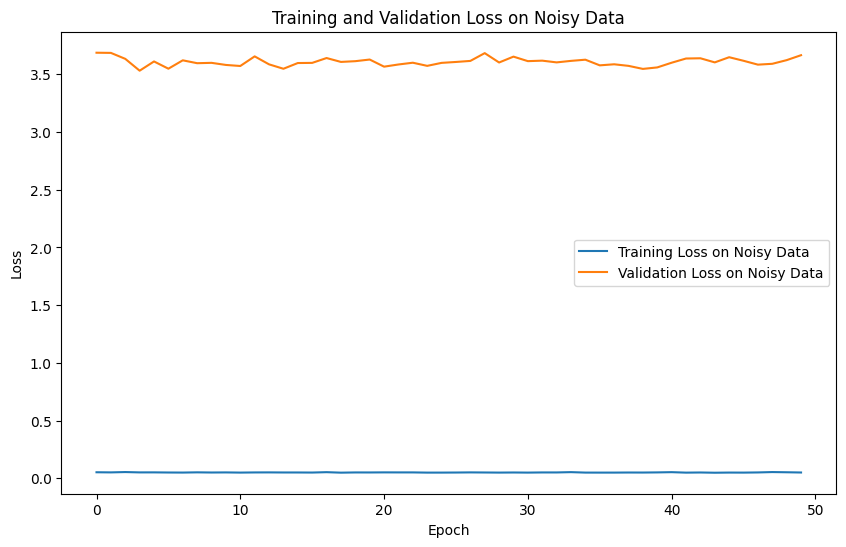

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


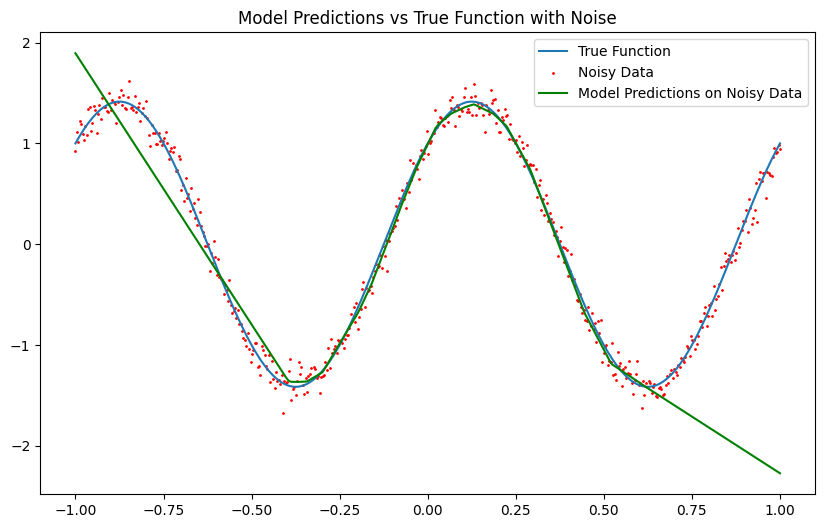

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# Define a more complex function for data generation
def generate_data(x):
    """Generates true function values with an option to add noise."""
    y_true = np.sin(2 * np.pi * x) + np.cos(2 * np.pi * x)  # Combination of sine and cosine
    return y_true

# Generate input data
x = np.linspace(-1, 1, 500).reshape(-1, 1)

# Generate clean and noisy output data
y_true = generate_data(x)
noise = np.random.normal(0, 0.1, y_true.shape)  # Adjusted noise level
y_noisy = y_true + noise

# Define the neural network model
def create_model():
    model = Sequential([
        layers.Dense(32, activation='relu', input_shape=(1,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = create_model()

# Train on the clean data
history_clean = model.fit(x, y_true, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

# Calculate MSE on clean data
mse_clean = model.evaluate(x, y_true, verbose=0)
print(f"Mean Squared Error on Clean Data: {mse_clean:.4f}")

# Plot training history for clean data
plt.figure(figsize=(10, 6))
plt.plot(history_clean.history['loss'], label='Training Loss on Clean Data')
plt.plot(history_clean.history['val_loss'], label='Validation Loss on Clean Data')
plt.title('Training and Validation Loss on Clean Data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make and plot predictions on the clean data
y_pred_clean = model.predict(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='True Function')
plt.plot(x, y_pred_clean, label='Model Predictions on Clean Data')
plt.title('Model Predictions vs True Function on Clean Data')
plt.legend()
plt.show()

# Re-train on the noisy data
history_noisy = model.fit(x, y_noisy, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

# Calculate MSE on noisy data
mse_noisy = model.evaluate(x, y_noisy, verbose=0)
print(f"Mean Squared Error on Noisy Data: {mse_noisy:.4f}")

# Plot training history for noisy data
plt.figure(figsize=(10, 6))
plt.plot(history_noisy.history['loss'], label='Training Loss on Noisy Data')
plt.plot(history_noisy.history['val_loss'], label='Validation Loss on Noisy Data')
plt.title('Training and Validation Loss on Noisy Data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make and plot predictions on the noisy data
y_pred_noisy = model.predict(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='True Function')
plt.scatter(x, y_noisy, color='red', s=1, label='Noisy Data')
plt.plot(x, y_pred_noisy, color='green', label='Model Predictions on Noisy Data')
plt.title('Model Predictions vs True Function with Noise')
plt.legend()
plt.show()
